# Sales Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\EDA\\EDA\\Sales Data.csv', encoding='windows-1252')

In [39]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [41]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [42]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(11239, 13)

In [45]:
print(df['Amount'].dtypes)

float64


In [46]:
df['Amount'] = df['Amount'].astype(int)

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [49]:
 df[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11239.000000,11239.000000,11239.000000
mean,9453.610553,35.410357,2.489634
std,5222.355168,12.753866,1.114967
min,188.000000,12.000000,1.000000
25%,5443.000000,27.000000,2.000000
50%,8109.000000,33.000000,2.000000
75%,12675.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


# Exploratory Data Analysis

## Gender

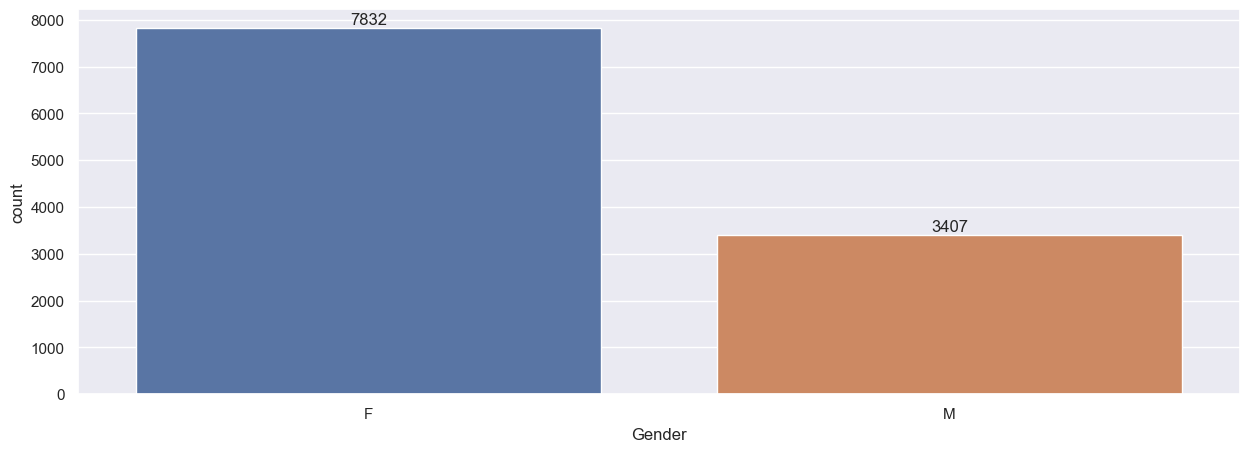

In [63]:
ax= sns.countplot(x= 'Gender',data=df)
sns.set(rc={'figure.figsize':(10,5)})

for y in ax.containers:
    ax.bar_label(y)

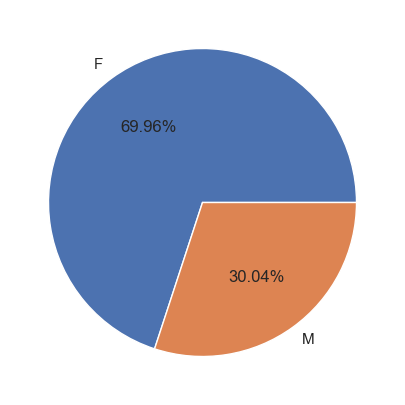

In [51]:
sales_amount=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.pie(sales_amount['Amount'],labels=sales_amount['Gender'],autopct="%0.2f%%")
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## AGE GROUP

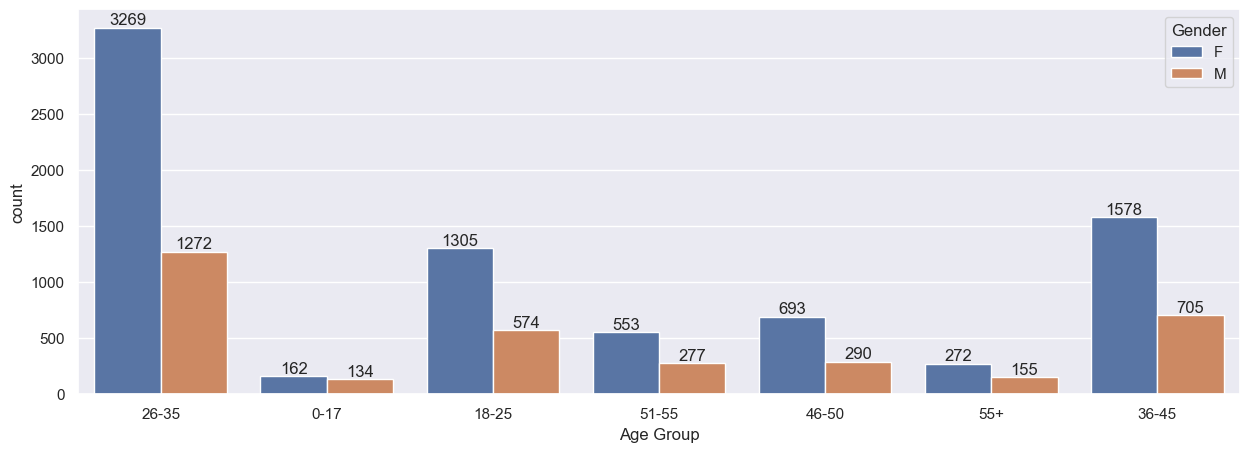

In [65]:
ax= sns.countplot(x= 'Age Group',data=df,hue = 'Gender')

sns.set(rc={'figure.figsize':(20,5)})

for y in ax.containers:
    ax.bar_label(y)

<Axes: xlabel='Age Group', ylabel='Amount'>

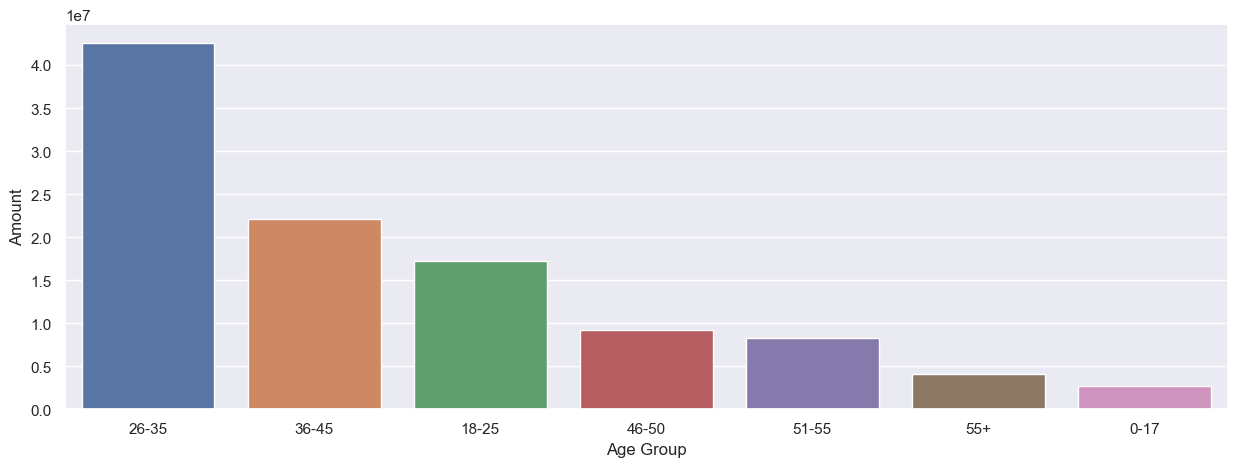

In [68]:
 sales_age =df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Age Group',y='Amount',data=sales_age)



From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

## Marital_Status

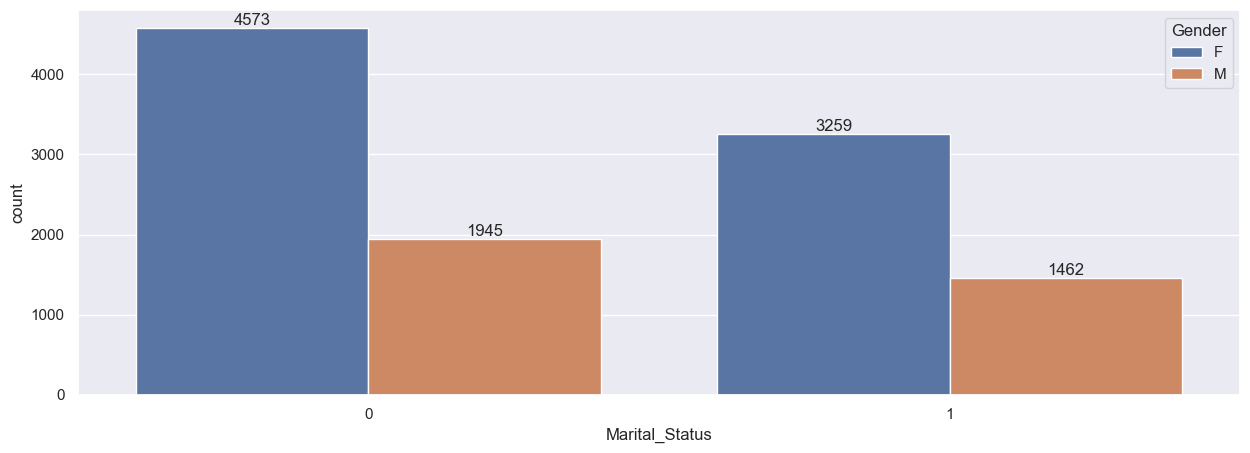

In [69]:
ax = sns.countplot(x='Marital_Status',data=df,hue = 'Gender')
sns.set(rc={'figure.figsize':(15,5)})

for y in ax.containers:
    ax.bar_label(y)
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

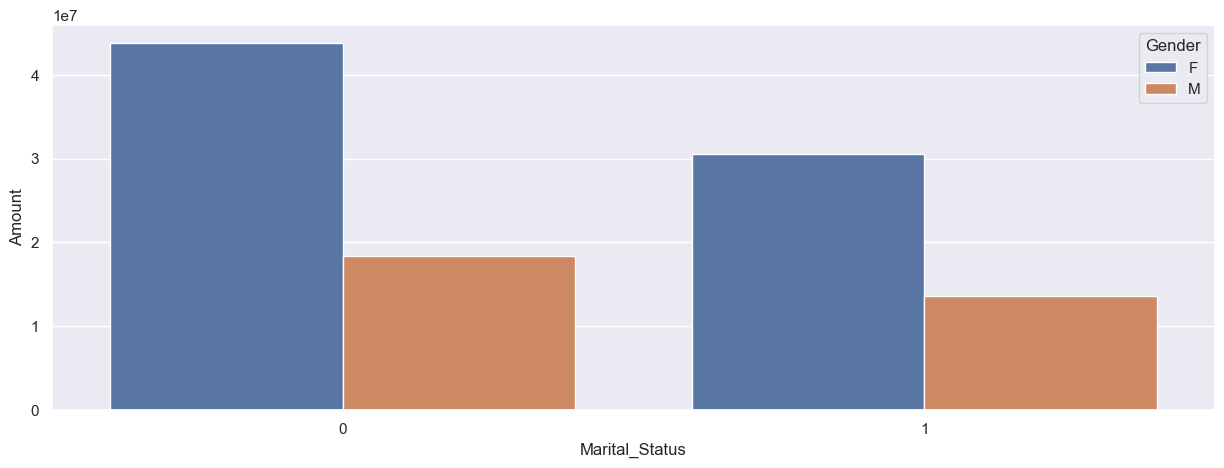

In [72]:
 sales_age =df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_age,x='Marital_Status',y='Amount', hue='Gender')


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## State

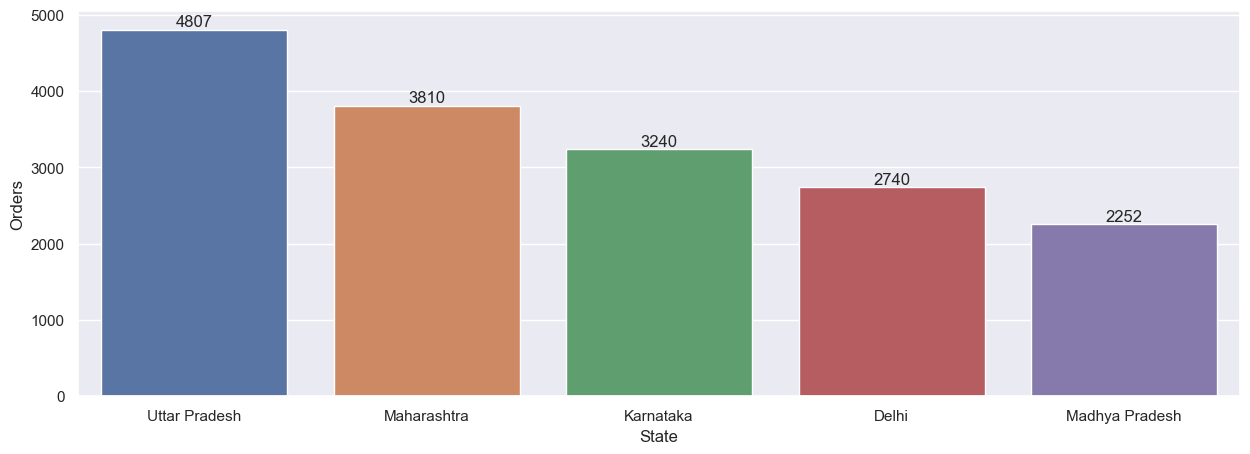

In [56]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head()
#plt.barh(sales_state['State'],sales_state['Orders'],width=0.5)


sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = sales_state, x = 'State',y= 'Orders')
for y in ax.containers:
    ax.bar_label(y)
    

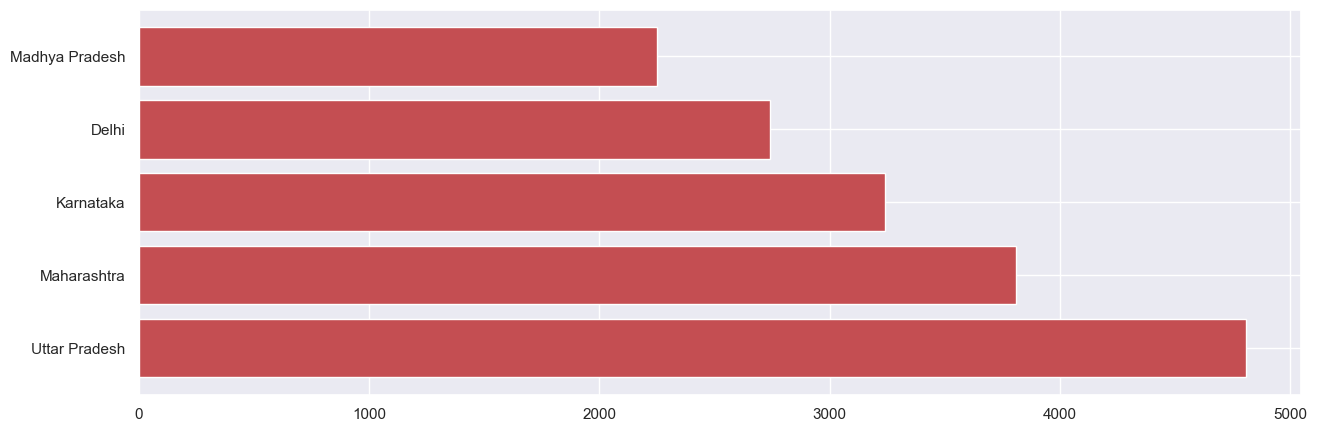

In [57]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head()


x= sales_state['State']
y= sales_state['Orders']
plt.barh(x,y,color='r')

plt.show()



From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## occupation 


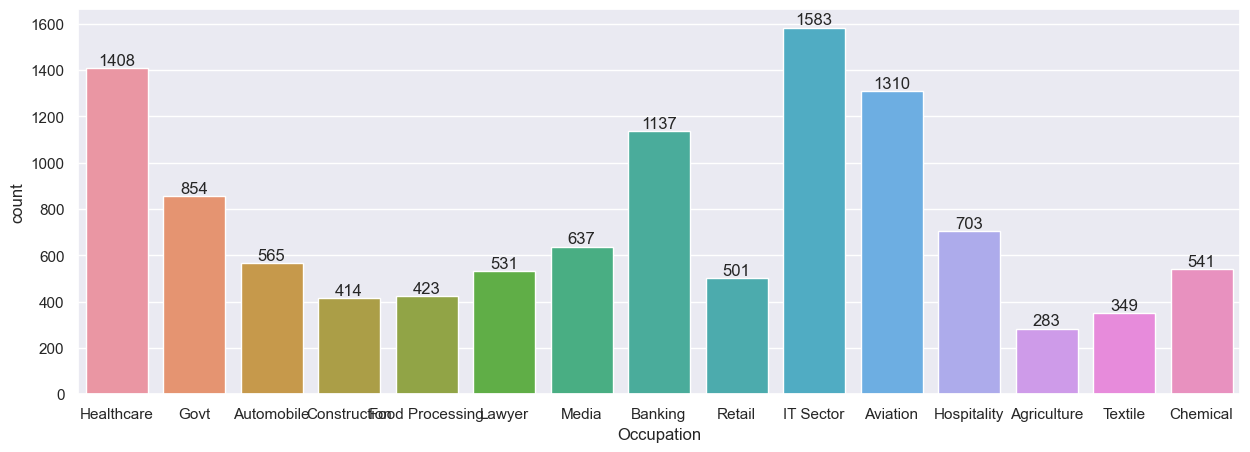

In [58]:
#sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

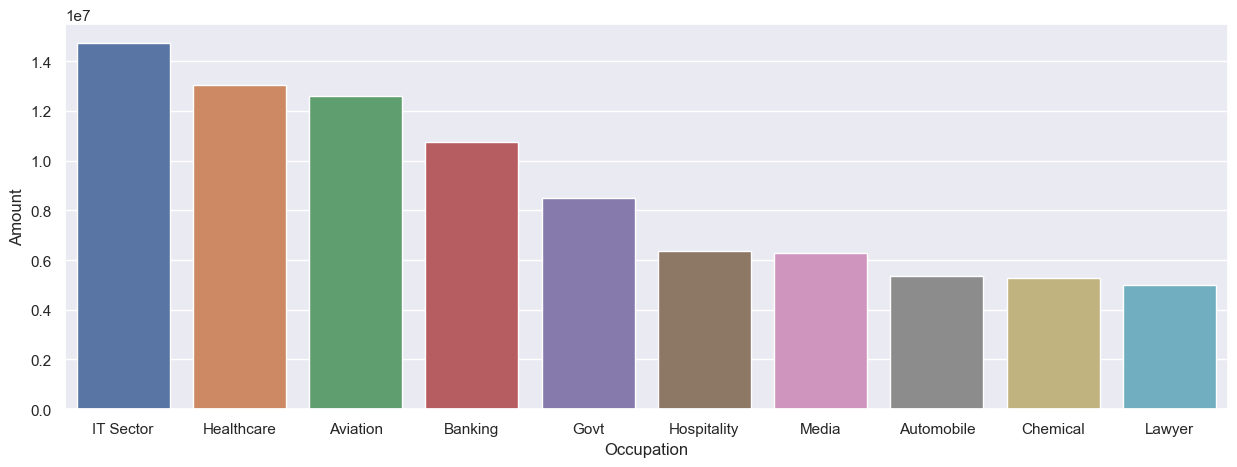

In [59]:
sales_occupation= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data = sales_occupation,x='Occupation',y='Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector


## Product_Category

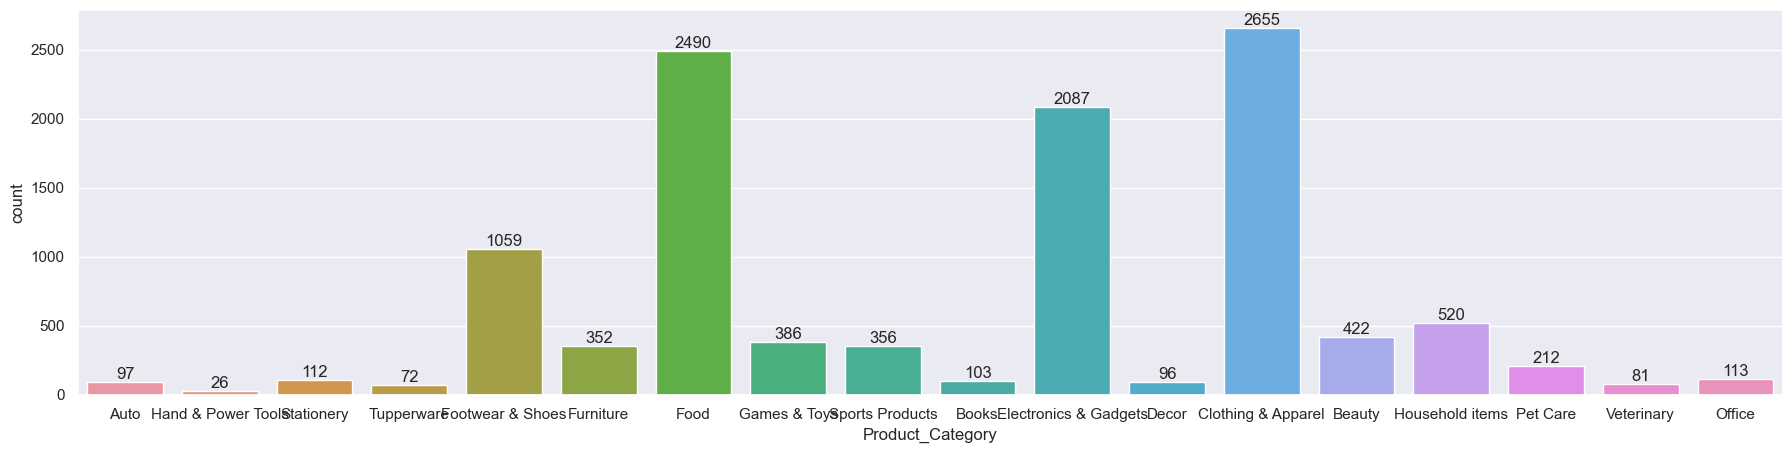

In [60]:
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

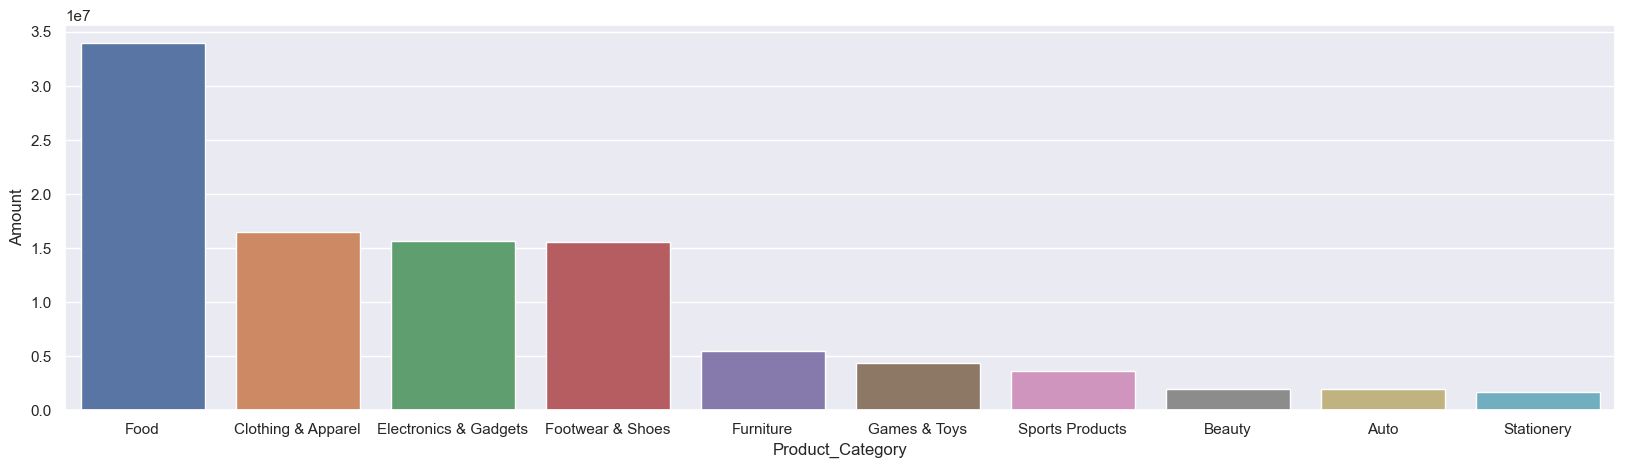

In [61]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category